In [71]:
import pandas as pd

In [72]:
df = pd.read_csv("hashtags.csv")

In [73]:
df.head()

,tweet_id,created_at,retweet_count,favorite_count,text
0,1325951081810022400,2020-11-09T23:59:07.000Z,0,0,#ExposeUSPS #ExposeTheCoup #expose2020 https...
1,1325917560517390337,2020-11-09T21:45:55.000Z,85,0,RT @KYLE_P_WOODY: How does Biden get all the v...
2,1325910318074171392,2020-11-09T21:17:08.000Z,3,0,RT @Truth4Saints: For all that is secret will ...
3,1325901022087278592,2020-11-09T20:40:12.000Z,3,0,RT @Truth4Saints: For all that is secret will ...
4,1325900965594140672,2020-11-09T20:39:58.000Z,3,5,For all that is secret will eventually be brou...


In [76]:
df.created_at.dtype

dtype('O')

In [78]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [79]:
df['Date']=df['created_at'].dt.date

In [80]:
df.head()

,tweet_id,created_at,retweet_count,favorite_count,text,Date
0,1325951081810022400,2020-11-09 23:59:07+00:00,0,0,#ExposeUSPS #ExposeTheCoup #expose2020 https...,2020-11-09
1,1325917560517390337,2020-11-09 21:45:55+00:00,85,0,RT @KYLE_P_WOODY: How does Biden get all the v...,2020-11-09
2,1325910318074171392,2020-11-09 21:17:08+00:00,3,0,RT @Truth4Saints: For all that is secret will ...,2020-11-09
3,1325901022087278592,2020-11-09 20:40:12+00:00,3,0,RT @Truth4Saints: For all that is secret will ...,2020-11-09
4,1325900965594140672,2020-11-09 20:39:58+00:00,3,5,For all that is secret will eventually be brou...,2020-11-09


steps: 
    
    - split df by hashtag
    - frequency by date column
    - make cumulative frequency column by date
    - plot date x cumulative frequency
    


In [84]:
st = "#cats"

contains("cats")

AttributeError: type object 'str' has no attribute 'contains'

In [95]:
hashtag_list = ["election2020", "lyinglindsey", "moscowmitch", "expose2020"]
list_of_dfs = []

for hashtag in (hashtag_list):
    dataframe = df[['tweet_id','Date']].loc[df['text'].str.contains(hashtag, case=False)]
    list_of_dfs.append(dataframe)

In [99]:
len(df)

2235

In [104]:
len(list_of_dfs[0])

45

In [105]:
election2020 = list_of_dfs[0]

In [106]:
expose2020 = list_of_dfs[3]

In [107]:
election2020.head()

,tweet_id,Date
18,1325476402976747521,2020-11-08
22,1325440669125644288,2020-11-08
24,1325438548279963649,2020-11-08
28,1325272749816897537,2020-11-08
36,1325202026297499649,2020-11-07


In [108]:
election2020_freq =  election2020.groupby(['Date']).count()

In [110]:
election2020_freq.columns

Index(['tweet_id'], dtype='object')

In [125]:
election2020_freq['cumulative_frequency'] = election2020_freq.iloc[:, 0].cumsum()

In [126]:
election2020_freq

,tweet_id,cumulative_frequency
Date,,
2020-09-28,1,1
2020-10-01,1,2
2020-10-05,1,3
2020-10-06,1,4
2020-10-07,1,5
2020-10-10,2,7
2020-10-13,1,8
2020-10-14,1,9
2020-10-15,3,12


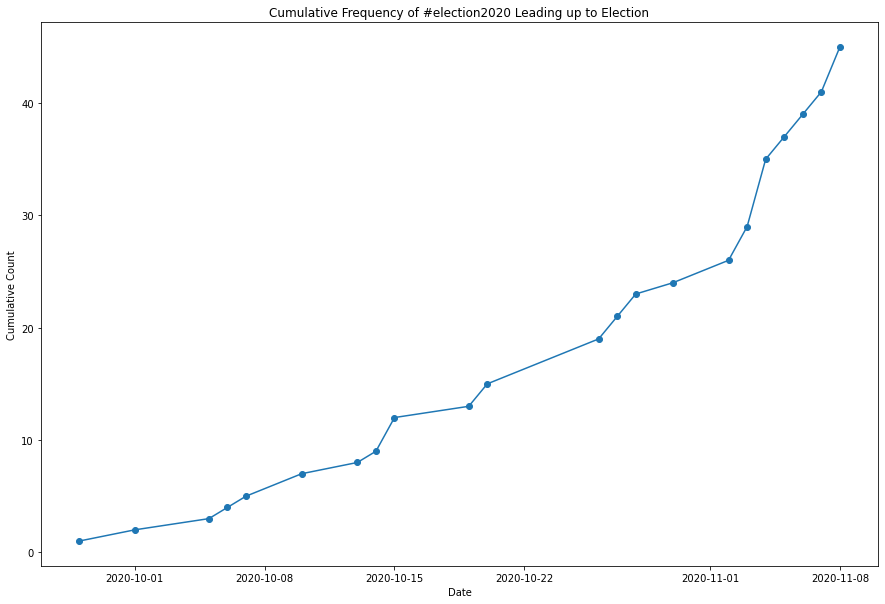

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

x = election2020_freq.index
y = election2020_freq['cumulative_frequency']

plt.title("Cumulative Frequency of #election2020 Leading up to Election")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")

# plot

plt.plot(x,y, '-o')

plt.show()

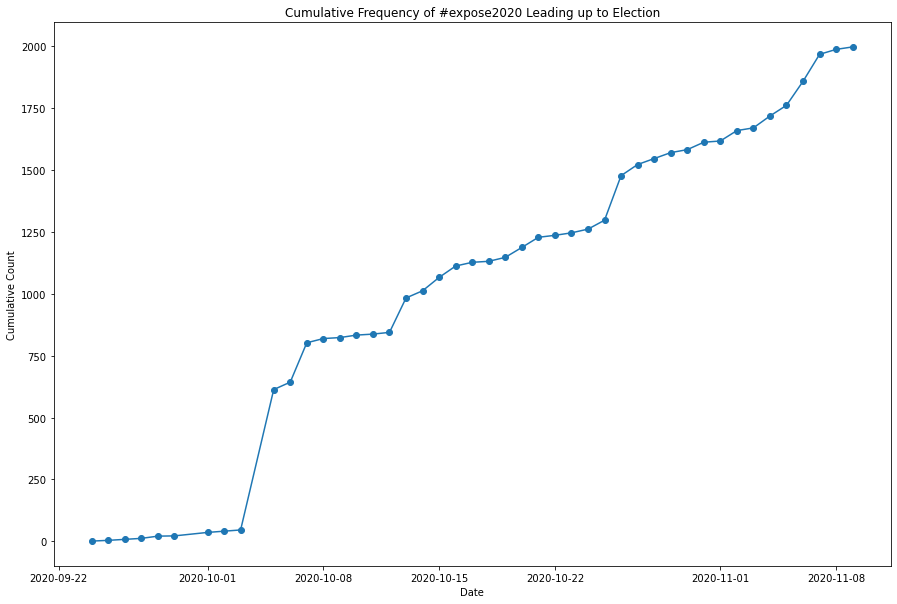

In [129]:
expose2020_freq =  expose2020.groupby(['Date']).count()
expose2020_freq['cumulative_frequency'] = expose2020_freq.iloc[:, 0].cumsum()

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

x = expose2020_freq.index
y = expose2020_freq['cumulative_frequency']

plt.title("Cumulative Frequency of #expose2020 Leading up to Election")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")

# plot

plt.plot(x,y, '-o')

plt.show()